In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [34]:
df = pd.read_csv("traffic.csv")

In [35]:
df.isnull().sum()

Date      1684
Visits    1684
dtype: int64

In [36]:
df.shape

(1916, 2)

In [37]:
df = df.dropna(how="any")

In [39]:
df["Date"] = df["Date"].str.replace("/", "-")

In [40]:
df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%Y")

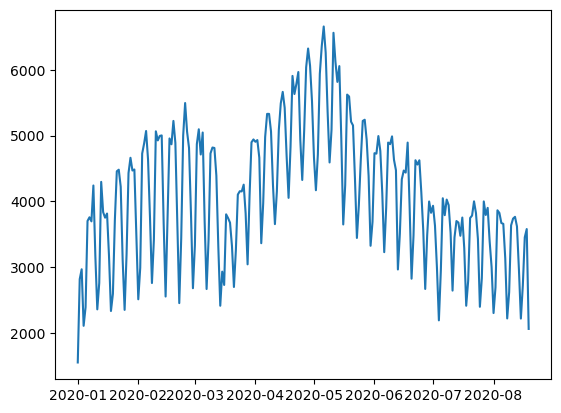

In [41]:
plt.figure()
plt.plot(df["Date"], df["Visits"])
plt.show()

In [42]:
model = sm.tsa.statespace.SARIMAX(df["Visits"], order=(5, 1, 2), seasonal_order=(5, 1, 2, 12))

In [43]:
model = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28068D+00    |proj g|=  6.23307D-01

At iterate    5    f=  7.04918D+00    |proj g|=  8.29517D-02

At iterate   10    f=  7.01479D+00    |proj g|=  1.47382D-01

At iterate   15    f=  7.00858D+00    |proj g|=  1.35742D-01

At iterate   20    f=  7.00504D+00    |proj g|=  1.65279D-02

At iterate   25    f=  7.00407D+00    |proj g|=  4.94043D-02

At iterate   30    f=  7.00341D+00    |proj g|=  2.60780D-02

At iterate   35    f=  6.99231D+00    |proj g|=  8.00241D-02

At iterate   40    f=  6.98460D+00    |proj g|=  4.14995D-02

At iterate   45    f=  6.98285D+00    |proj g|=  2.76814D-02


/Users/alperkaraca/anaconda3/envs/TF/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  6.98255D+00    |proj g|=  8.92469D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     57      1     0     0   8.925D-03   6.983D+00
  F =   6.9825504539447758     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [44]:
preds = model.predict(len(df), len(df) + 50)
preds

232    2350.928473
233    2244.604657
234    1942.886691
235    2418.940260
236    3515.076725
237    3215.360815
238    2273.307183
239    2239.462752
240    2169.171487
241    1851.707639
242    2403.431427
243    2936.042318
244    2769.953516
245    2120.321510
246    2062.879538
247    2118.067345
248    1874.857095
249    2311.783767
250    2899.899477
251    2792.686568
252    2091.510947
253    1976.195190
254    1944.288284
255    1488.683133
256    1953.114369
257    2645.706303
258    2600.266512
259    2089.236095
260    1842.697373
261    1800.877762
262    1599.353947
263    2075.495982
264    2511.284607
265    2488.462637
266    2000.699230
267    1607.243253
268    1553.197176
269    1532.821734
270    1955.014020
271    2437.469874
272    2302.293818
273    1919.212095
274    1624.079805
275    1640.760634
276    1507.674914
277    1894.104836
278    2285.865831
279    1976.443881
280    1637.012075
281    1483.083961
282    1492.720519
Name: predicted_mean, dtype: fl

<Axes: >

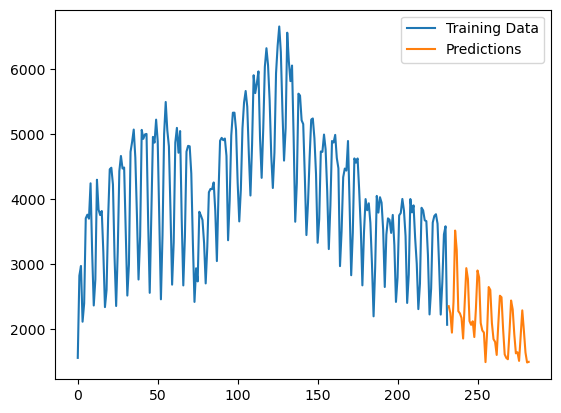

In [46]:
df["Visits"].plot(legend=True, label="Training Data")
preds.plot(legend=True, label="Predictions")